In [ ]:
# Gekko Model construction workflow:
import numpy as np
# 1. import gekko and create model:
from gekko import GEKKO

m = GEKKO(remote=False)

# 2. define full model dimensionality
ni = 100  # number of rows
nj = 100  # number of columns


xchange = m.Array(m.Var,(ni,nj),value=0.)

# initialise components:
x = m.Array(m.Var,(ni,nj),value=0.)

# init
for i in range(ni):
    for j in range(nj):
        
        x[30,30].value = 2.0
        x[40,40].value = 2.0
        x[50,50].value = 2.0
        x[60,60].value = 2.0
        

#define component_fluxes within grid_cells
for i in range(ni):
    for j in range(nj):
        m.Equation(x[i][j].dt()== xchange[i,j])  # x[i][j]*0.1 +
        
        
#define component_fluxes within grid_cells
#for i in range(ni):
#    for j in range(nj):
        # edges = 
        
        # else = 
for i in [0,ni-1]:
    for j in range(nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0)
        
for j in [ni-1,0]:
    for i in range(nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0)

for i in range(1,ni-1):
    for j in range(1,nj-1):
        #print(i,j)
        m.Equation(xchange[i,j].dt() == 0.1 * ((x[i+1][j] - 2* x[i,j] + x[i-1,j]) + (x[i][j+1] - 2* x[i,j] + x[i,j-1])) )
        
# provide time to model
t = m.Var(0); m.Equation(t.dt()==1)

time = np.arange(0,20)
m.time = time

m.options.imode = 7
m.options.solver = 1
m.options.nodes = 3

m.solve() # disp=False)
print('succesfully solved')

In [ ]:
import matplotlib.pyplot as plt
xx = np.array([[x[i][j] for i in range(ni)] for j in range(nj)], dtype='float64')


for i in range(20):
    
    plt.imshow(xx[:,:,i])
    plt.show()

In [3]:
from gekko import GEKKO

In [4]:
a = GEKKO()

In [5]:
import numpy

In [3]:
import matplotlib.pyplot as plt
#xx = np.array(x[0], dtype='float64')
x
#plt.plot(xx)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

TODOlist, for implementing Gekko/XSIMLAB crossover

# Follow the design of Gekko! create specific xsimlab wrappers

- xs.any_object core keeping track of all necessary params
- 



# I need an xs.any_object core object, that is updated with each component/flux/etc added, that handles gekko "backend" and flexibility, as well as parameters and their assignment.

# Environment stores grid and passes dims to variables

# Fluxes are m.Intermediate
# Fluxes contain necessary parameters
# Fluxes can be flexibly assigned to Components


# Components/SVs store equation/matrix of m.Equations

# Gridfluxes are also computed as intermediates

#


# provide choice for solver, step-wise or gekko


In [2]:
m = GEKKO(remote=False) 

In [ ]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

In [ ]:
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

m = GEKKO(remote=True)             # create GEKKO model
m.options.IMODE = 2     # solution mode
x = m.Param(value=np.linspace(-1,6)) # prediction points
y = m.Var()             # prediction results
m.cspline(x, y, xm, ym) # cubic spline
m.solve()#disp=False)     # solve

# create plot
plt.plot(xm,ym,'bo')
plt.plot(x.value,y.value,'r--',label='cubic spline')
plt.legend(loc='best')

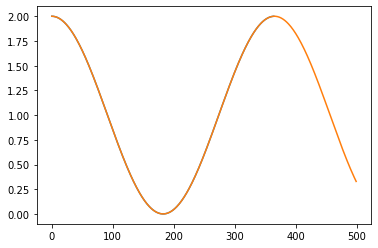

In [107]:
data_time = np.arange(365)
N0 = np.cos(data_time / 365*2*np.pi) + 1

ForcingInt = intrp.CubicSpline(np.arange(len(data_time)*3), np.concatenate([N0,N0,N0], axis=None))

plt.plot(N0)

plt.plot(ForcingInt(np.arange(500)))

In [3]:
raise('Hi')

TypeError: exceptions must derive from BaseException

In [4]:
ForcingInt

In [8]:
import numpy as np
from gekko import GEKKO
#import matplotlib.pyplot as plt
import scipy.interpolate as intrp

def phydra_EQ_add(Component, EQ2add):
    a = np.nditer(Component, flags=['zerosize_ok','refs_ok', 'multi_index'])
    b = np.nditer(EQ2add, flags=['zerosize_ok','refs_ok', 'multi_index'])
    while not b.finished:
        while not a.finished:
            print(a.value, b.value)
            m.Equation(Component[a.multi_index].dt() == EQ2add[b.multi_index])
            a.iternext()
        b.iternext()

def blowup_Dims(IN, FullDims, type_func):
    OUT = np.array(FullDims, dtype='object')
    INiterator = np.nditer(IN, flags=['zerosize_ok','refs_ok', 'multi_index'])
    for inVal in INiterator:
        OUT[...] = type_func(inVal)
        
    print(OUT)
    return OUT



m = GEKKO()   

t = m.SV(0)

#N = m.SV(1)

time = np.arange(0, 700)
#N0 = m.Var() #m.Param(np.linspace(2, 1, len(time)))
D1_dims = 5
Ns = blowup_Dims(1, (2,2), m.SV)

print(Ns)
#Ns = m.Array(m.SV,(D1_dims, D1_dims))
print(Ns.dtype)

print(Ns.shape)
    
Ns_EQ = m.Array(m.Param,(D1_dims, D1_dims))

def phydra_Param_add(Param, Part):
    a = np.nditer(Param, op_flags=['readwrite'], flags=['zerosize_ok','refs_ok', 'multi_index'])
    b = np.nditer(Part, op_flags=['readwrite'], flags=['zerosize_ok','refs_ok', 'multi_index'])
    while not b.finished:
        while not a.finished:
            print(a.value, type(a.value), b.value, type(b.value))
            Param[a.multi_index] = Part[b.multi_index]
            a.iternext()
        b.iternext()
        
    return Param
        

N0_int = ForcingInt(np.mod(time, 365.))

Ns_EQ = phydra_Param_add(Ns_EQ, N0_int - N)

#Ns_EQ = [m.Intermediate(N0_int - N)]

phydra_EQ_add(Ns, Ns_EQ)

m.Equation(t.dt() == 1)
    


m.time = time

m.options.IMODE = 7

m.solve(disp=False)

[1 1]
[1 1]
object
(2,)


NameError: name 'ForcingInt' is not defined

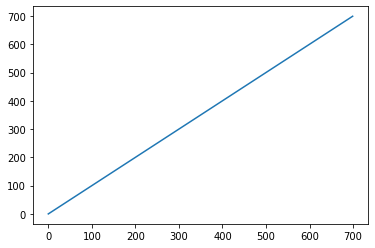

In [81]:
plt.plot(time, Ns[0,0])

In [3]:
print('hello world')

hello world


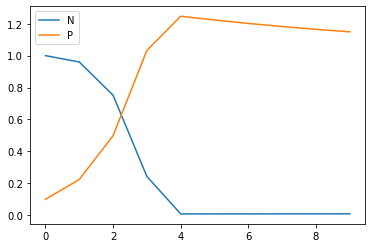

In [15]:
import numpy as np
from scipy.integrate import odeint

halfsat = 0.1
N0 = 1.
inflow = 0.1
mortality_rate = 0.1

def model(y,t):
    N,P = y
    nutlim = N/(N+halfsat)*P
    influx = N0 * inflow
    mortality = P * mortality_rate
    
    dNdt = influx - nutlim
    dPdt = nutlim - mortality
    return [dNdt, dPdt]

model_time = np.arange(0,10)
out = odeint(model,[1,0.1],model_time)

plt.plot(model_time,out[:,0], label='N')
plt.plot(model_time,out[:,1], label='P')
plt.legend()

In [22]:
print(t)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


In [80]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model

m.halfsat_const = m.Param(0.1, name='halfsat_const')
m.N0 = m.Param(1., name='N0')
m.inflow_rate = m.Param(0.1, name='inflow_rate')
m.mortality_rate = m.Param(0.1, name='mortality_rate')

m.N = m.SV(1, name='Nutrient')
m.P = m.SV(0.1, name='Phytoplankton')

start_range = 5
start_tinysteps=np.arange(0,start_range, .1)
t = np.arange(start_range,10)

new_t = np.concatenate([start_tinysteps, t])
m.time = new_t

m.nutlim = m.Intermediate(m.N/(m.N+m.halfsat_const)*m.P, name='NutrientLimitation')
m.N_influx = m.Intermediate(m.N0 * m.inflow_rate)
m.mortality = m.Intermediate(m.P * m.mortality_rate)


m.Equation(m.N.dt()==m.N0 * m.inflow_rate - m.N/(m.N+m.halfsat_const)*m.P)
m.Equation(m.P.dt()==m.N/(m.N+m.halfsat_const)*m.P - m.P * m.mortality_rate)

m.options.REDUCE = 3
m.options.NODES = 3
m.options.IMODE = 7

In [81]:
%%time
m.solve(disp=False)

CPU times: user 356 ms, sys: 10.2 ms, total: 366 ms
Wall time: 1.75 s


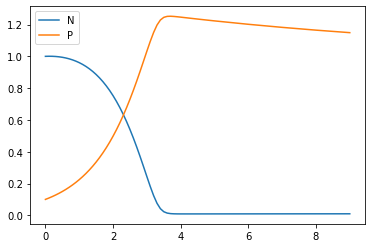

In [82]:
plt.plot(new_t, m.N, label='N')
plt.plot(new_t, m.P, label='P')
plt.legend()

nutrient [1.0, 0.99180176945]
nutrient [0.991801769, 0.94772441387]
nutrient [0.947724414, 0.84871990901]
nutrient [0.848719909, 0.66860974514]
nutrient [0.668609745, 0.38264786347]
nutrient [0.382647863, 0.062642921888]
nutrient [0.0626429219, 0.0089440668804]
nutrient [0.00894406688, 0.0087874255541]
nutrient [0.00878742555, 0.0088876388588]
nutrient [0.00888763886, 0.0089853690306]


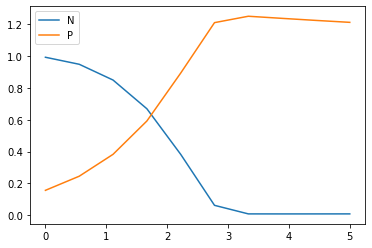

In [19]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO(remote=False)    # create GEKKO model

m.halfsat_const = m.Param(0.1, name='halfsat_const')
m.N0 = m.Param(1., name='N0')
m.inflow_rate = m.Param(0.1, name='inflow_rate')
m.mortality_rate = m.Param(0.1, name='mortality_rate')

m.N = m.SV(1, name='Nutrient')
m.P = m.SV(0.1, name='Phytoplankton')

t = np.linspace(0,5,10)
m.time = [t[0],t[1]]

m.nutlim = m.Intermediate(m.N/(m.N+m.halfsat_const)*m.P, name='NutrientLimitation')
m.N_influx = m.Intermediate(m.N0 * m.inflow_rate)
m.mortality = m.Intermediate(m.P * m.mortality_rate)


m.Equation(m.N.dt()==m.N0 * m.inflow_rate - m.N/(m.N+m.halfsat_const)*m.P)
m.Equation(m.P.dt()==m.N/(m.N+m.halfsat_const)*m.P - m.P * m.mortality_rate)

m.options.IMODE = 4

N = []
P = []
for i in range(len(t)):
    #print(i, end="", flush=True)
    m.solve(disp=False)
    # record values for plotting
    print(m.N, m.N.value)
    N.append(m.N.value[1])
    P.append(m.P.value[1])

plt.plot(t, N, label='N')
plt.plot(t, P, label='P')
plt.legend()

In [2]:
print(Hello)

NameError: name 'Hello' is not defined

In [3]:
nutlim.VALUE

NameError: name 'nutlim' is not defined

In [31]:
m.get_names()

Found N0
Found mortality
Found N
Found P
Found nutlim
Found influx
Found halfsat_const
Found inflow_rate
Found mortality_rate
Found N_influx


In [24]:
m.GUI()

Opening display in default webbrowser at http://localhost:8050/index.html. 
Close display tab or type CTRL+C to exit.
Starting Flask Thread on port 8050
 * Serving Flask app "gekko.gk_gui" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [2]:
m.gk_logic_tree()

NameError: name 'm' is not defined

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


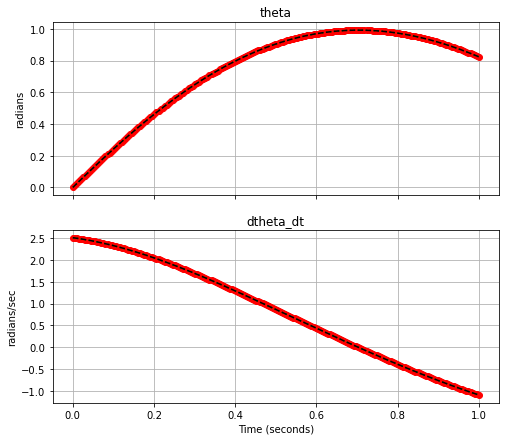

In [10]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Number of timesteps
nt = 200
tm = np.linspace(0, 1, nt)

# Initialize GEKKO
p1 = GEKKO(remote=False)
p2 = GEKKO(remote=False)
p3 = GEKKO(remote=False)

# define model
for p in [p1,p2,p3]:
    if p==p3:
        p.time = [tm[0],tm[1]]
    else:
        p.time = tm

    # Model parameters
    p.g = p.Const(value=9.81, name='g')
    p.l = p.Const(value=2., name='length')
    p.m = p.Const(value=1.0, name='mass')
    p.f = p.Const(value=0.5, name='friction coefficient')

    # State Variables
    p.theta = p.Var(value=0, name='angle')
    p.dtheta_dt = p.Var(value=2.5, name='angular velocity')

    # Equations
    p.Equation(p.theta.dt() == p.dtheta_dt)
    p.Equation(p.dtheta_dt.dt() == \
               -p.g/p.l*p.sin(p.theta) - p.f/p.m*p.dtheta_dt)
    p.options.NODES=5

# Solve simultaneously
p1.options.IMODE=4
p1.solve(disp=False)

p2.options.IMODE=7
p2.solve(disp=False)

p3.options.IMODE=4
th = np.ones_like(tm)
dth = np.ones_like(tm)
th[0] = 0
dth[0] = 2.5
import time
for i in range(1,nt):
    print(i)
    p3.solve(disp=False)

    # record values for plotting
    th[i] = p3.theta.value[1]
    dth[i] = p3.dtheta_dt.value[1]

# Plot results
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8,7))

axes[0].plot(tm, p1.theta.value, 'o-',color='red')
axes[0].plot(tm, p2.theta.value, ':',color='green')
axes[0].plot(tm, th, '--',color='black')
axes[0].set_title("theta")
axes[0].set_ylabel('radians')
axes[0].grid()

axes[1].plot(tm, p1.dtheta_dt.value, 'o-',color='red')
axes[1].plot(tm, p2.dtheta_dt.value, ':',color='green')
axes[1].plot(tm, dth, '--',color='black')
axes[1].set_title("dtheta_dt")
axes[1].set_ylabel('radians/sec')
axes[1].grid()
axes[1].set_xlabel('Time (seconds)')

plt.show()

In [ ]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model

halfsat = m.Param(0.1)
N0 = m.Param(1.)
inflow = m.Param(0.1)
mortality = m.Param(0.1)

N = m.SV(1)
P = m.SV(0.1)

t = np.arange(0,10)
#m.time = t

nutlim = m.Intermediate(N/(N+halfsat)*P)
inflow = m.Intermediate(N0 * inflow)
mortality = m.Intermediate(P * mortality)

m.Equation(N.dt()==inflow - nutlim)
m.Equation(P.dt()==nutlim - mortality)

m.options.IMODE = 4

for i in t:
    m.solve(disp=False)

plt.plot(m.time, N)
plt.plot(m.time, P)

In [22]:
t = np.arange(0,10)
m.time = t
m.solve(disp=False)

ValueError: x and y must have same first dimension, but have shapes (10,) and (1000,)

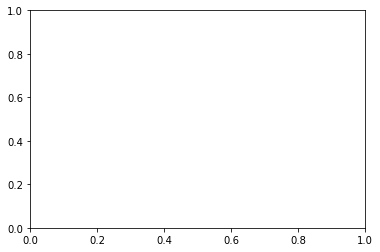

In [23]:
plt.plot(m.time, N)
plt.plot(m.time, P)

apm 75.80.96.79_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           10
   Intermediates:           15
   Connections  :            0
   Equations    :           25
   Residuals    :           10
 
 --- Begin Pre-solve  -----------------------
  Original nvar:         4320
  Original neqn:         4320
  Pre-solve turn off DOF
  Pre-solve Variables:         4320
  Pre-solve Equations:         4320
  --- Solve block size:           72
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.76437E-19  4.79667E-01
    1  2.77970E-21  3.74673E-02
    2  2.80949E-24

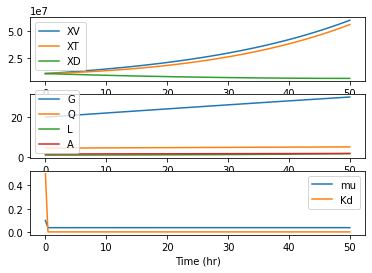

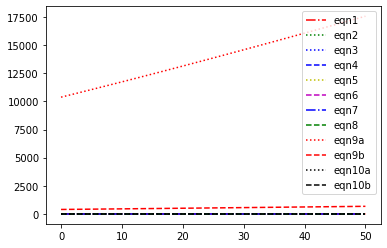

In [2]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model

#constants 3L continuous fed-batch
KdQ = 0.001        #degree of degradation of glutamine (1/h)
mG = 1.1e-10   #glucose maintenance coefficient (mmol/cell/hour)
YAQ = 0.90         #yield of ammonia from glutamine
YLG = 2            #yield of lactate from glucose
YXG = 2.2e8    #yield of cells from glucose (cells/mmol)
YXQ = 1.5e9    #yield of cells from glutamine (cells/mmol)
KL = 150           #lactate saturation constant (mM)
KA = 40            #ammonia saturation constant (mM)
Kdmax = 0.01       #maximum death rate (1/h)
mumax = 0.044      #maximum growth rate (1/h)
KG = 1             #glucose saturation constant (mM)
KQ = 0.22          #glutamine saturation constant (mM)
mQ = 0             #glutamine maintenance coefficient (mmol/cell/hour)
kmu = 0.01         #intrinsic death rate (1/h)
Klysis = 2e-2  #rate of cell lysis (1/h)
Ci_star = 100      #inhibitor saturation concentration (mM)
qi = 2.5e-10   #specific inhibitor production rate (1/h)

#Flow, volume and concentration
Fo = 0.001         #feed-rate (L/h)
Fi = 0.001         #feed-rate (L/h)
V = 3              #volume (L)
SG = 653           #glucose concentration in the feed (mM)
SQ = 58.8          #glutamine concentration in the feed (mM)

# create GEKKO parameter
t = np.linspace(0,50,121)
m.time = t

XTMM = m.Var(value=1,name='XT')            #total cell density (MMcells/L)
XVMM = m.Var(value=1,lb=0, name='XV')      #viable cell density (MMcells/L)
XDMM = m.Var(value=1.0,name='XD')          #dead cell density (MMcells/L)
G = m.Var(value = 20, name='G')            #glucose concentration (mM)
Q = m.Var(value = 4.5, name='Q')           #glutamine concentration (mM)
L = m.Var(value=1,name='L')                #lactate concentration (mM)
A = m.Var(value=1.6,name='A')              #ammonia concentration (mM)
Ci = m.Var(value=0.1,name='Ci')            #inhibitor concentration (mM)
mu = m.Var(value=0.1,name='mu')            #growth rate (1/h)
Kd = m.Var(value=0.5,name='Kd')            #death rate(1/h)

# scale back to cells/L from million cells/L
XT = m.Intermediate(XTMM*1e7)
XV = m.Intermediate(XVMM*1e7)
XD = m.Intermediate(XDMM*1e7)

e1 = m.Intermediate((mu*XV - Klysis*XD - XT*Fo/V)/1e7)
e2 = m.Intermediate(((mu - Kd)*XV - XV*Fo/V)/1e7)
e3 = m.Intermediate((Kd*XV - Klysis*XD - XV*Fo/V)/1e7)
e4 = m.Intermediate((Fi/V)*SG - (Fo/V)*G + (-mu/YXG - mG)*XV)
e5 = m.Intermediate((Fi/V)*SQ - (Fo/V)*Q + (-mu/YXQ - mQ)*XV - KdQ*Q)
e6 = m.Intermediate(-YLG*(-mu/YXG -mG)*XV-(Fo/V)*L)
e7 = m.Intermediate(-YAQ*(-mu/YXQ - mQ)*XV +KdQ*Q-(Fo/V)*A)
e8 = m.Intermediate(qi*XV - (Fo/V)*Ci)
e9a = m.Intermediate((Ci_star*(KG+G)*(KQ+Q)*(L/KL + 1)*(A/KA + 1)))
e9b = m.Intermediate((mumax*G*Q*(Ci_star-Ci)))
e10a = m.Intermediate((mu+kmu))
e10b = m.Intermediate(Kdmax*kmu)

# create GEEKO equations
m.Equation(XTMM.dt() == e1)
m.Equation(XVMM.dt() == e2)
m.Equation(XDMM.dt() == e3)
m.Equation(G.dt() == e4)
m.Equation(Q.dt() == e5)
m.Equation(L.dt() == e6)
m.Equation(A.dt() == e7)
m.Equation(Ci.dt() == e8)
m.Equation(e9a * mu == e9b)
m.Equation(e10a*Kd == e10b)

# solve ODE
m.options.IMODE = 4
m.options.SOLVER = 1
m.options.NODES = 3
m.options.COLDSTART = 2
#m.open_folder()
m.solve(display=False)

plt.figure()
plt.subplot(3,1,1)
plt.plot(m.time, XV.value,label='XV')
plt.plot(m.time, XT.value,label='XT')
plt.plot(m.time, XD.value,label='XD')
plt.legend()
plt.subplot(3,1,2)
plt.plot(m.time, G.value,label='G')
plt.plot(m.time, Q.value,label='Q')
plt.plot(m.time, L.value,label='L')
plt.plot(m.time, A.value,label='A')
plt.legend()
plt.subplot(3,1,3)
plt.plot(m.time, mu.value,label='mu')
plt.plot(m.time, Kd.value,label='Kd')
plt.legend()
plt.xlabel('Time (hr)')

plt.figure()
plt.plot(m.time, e1.value,'r-.',label='eqn1')
plt.plot(m.time, e2.value,'g:',label='eqn2')
plt.plot(m.time, e3.value,'b:',label='eqn3')
plt.plot(m.time, e4.value,'b--',label='eqn4')
plt.plot(m.time, e5.value,'y:',label='eqn5')
plt.plot(m.time, e6.value,'m--',label='eqn6')
plt.plot(m.time, e7.value,'b-.',label='eqn7')
plt.plot(m.time, e8.value,'g--',label='eqn8')
plt.plot(m.time, e9a.value,'r:',label='eqn9a')
plt.plot(m.time, e9b.value,'r--',label='eqn9b')
plt.plot(m.time, e10a.value,'k:',label='eqn10a')
plt.plot(m.time, e10b.value,'k--',label='eqn10b')
plt.legend()

plt.show()